# Librerias

In [1]:
#Proyecto de recomendación de bolsos para dama
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/filtered_bags_women.csv")
df["image"][1569]

'http://assets.myntassets.com/v1/images/style/properties/Lino-Perros-Women-Leatherette-Beige-Handbage28767ed15b93718cf51217e7ec69eed_images.jpg'

In [ ]:
print("Columnas disponibles:", df.columns)
#print(df.head(3))


Columnas disponibles: Index(['id', 'articleType', 'baseColour', 'season', 'usage',
       'productDisplayName', 'image', 'masterCategory', 'gender',
       'subCategory'],
      dtype='object')


# Todos los colores

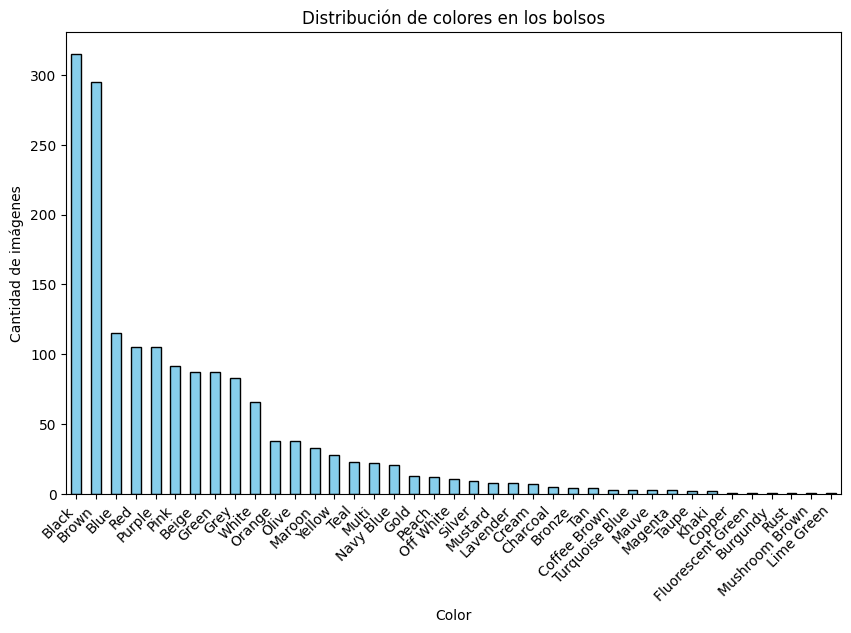

In [ ]:
# Contar cuántos bolsos hay por color
color_counts = df["baseColour"].value_counts()

# --- Gráfico de barras ---
plt.figure(figsize=(10,6))
color_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribución de colores en los bolsos")
plt.xlabel("Color")
plt.ylabel("Cantidad de imágenes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# === Librerías necesarias ===
import pandas as pd
import os
import cv2
import zipfile
import requests
from tqdm import tqdm
from io import BytesIO
from google.colab import drive

# === Ruta del dataset CSV ===
csv_path = "/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/filtered_bags_women.csv"

# Leer dataset
df = pd.read_csv(csv_path)

print("Columnas disponibles:", df.columns)
print(df.head(3))

# === Columnas a usar ===
id_col = "id"
color_col = "baseColour"
image_col = "image"

# === Carpeta base de salida ===
output_dir = "/content/bolsos_por_color"
os.makedirs(output_dir, exist_ok=True)

# === Colores seleccionados ===
selected_colors = ["Black", "Brown", "Blue", "Red", "Purple", "Pink", "Beige", "Green", "White", "Grey"]

# === Redimensionar, clasificar y guardar imágenes ===
for color in tqdm(selected_colors, desc="Procesando colores"):
    color_df = df[df[color_col].str.lower() == color.lower()]
    color_folder = os.path.join(output_dir, color)
    os.makedirs(color_folder, exist_ok=True)

    for _, row in color_df.iterrows():
        img_url = row[image_col]
        img_id = str(row[id_col])
        output_path = os.path.join(color_folder, f"{img_id}.jpg")

        try:
            response = requests.get(img_url, timeout=10)
            if response.status_code == 200:
                img_array = bytearray(response.content)
                img_np = cv2.imdecode(np.frombuffer(img_array, np.uint8), cv2.IMREAD_COLOR)
                if img_np is None:
                    continue
                resized = cv2.resize(img_np, (64, 64))
                cv2.imwrite(output_path, resized)
        except Exception as e:
            print(f"❌ Error al procesar {img_url}: {e}")

# === Comprimir todas las carpetas en un ZIP ===
zip_filename = "/content/bolsos_por_color.zip"
with zipfile.ZipFile(zip_filename, "w", zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file), output_dir))



print("✅ ¡Listo! Todas las imágenes fueron descargadas, redimensionadas y clasificadas por color.")
print("📦 Archivo ZIP disponible en:", zip_filename)

from google.colab import files
files.download("/content/bolsos_por_color.zip")

Columnas disponibles: Index(['id', 'articleType', 'baseColour', 'season', 'usage',
       'productDisplayName', 'image', 'masterCategory', 'gender',
       'subCategory'],
      dtype='object')
   id articleType baseColour  season   usage  \
0   0    Handbags       Blue  Summer  Casual   
1   1    Handbags      Brown  Summer  Casual   
2   2    Handbags      Brown  Winter  Casual   

                  productDisplayName  \
0          Murcia Women Blue Handbag   
1         Baggit Women Brown Handbag   
2  Murcia Women Casual Brown Handbag   

                                               image masterCategory gender  \
0  http://assets.myntassets.com/v1/images/style/p...    Accessories  Women   
1  http://assets.myntassets.com/v1/images/style/p...    Accessories  Women   
2  http://assets.myntassets.com/v1/images/style/p...    Accessories  Women   

  subCategory  
0        Bags  
1        Bags  
2        Bags  


Procesando colores: 100%|██████████| 10/10 [17:03<00:00, 102.36s/it]


✅ ¡Listo! Todas las imágenes fueron descargadas, redimensionadas y clasificadas por color.
📦 Archivo ZIP disponible en: /content/bolsos_por_color.zip


In [ ]:
from google.colab import files
files.download("/content/bolsos_por_color.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>